# ML Final Project - Wine Quality Classifier
*컴퓨터학과 2016320101 박성범*


## 0. Summary


### Dataset
- 12개의 Features, 6497개의 Instances를 갖는 Wine quality data 활용

### Preprocessing
- 결측값 처리(Missing value treatment): 결측값 제거
- 이상치 처리(Outlier value treatment): IQR 방식 활용하여 제거
- Scaler: Standard Scaler와 MinMax Scaler를 활용

### Data Analyasis
- 단변량 분석(Univariate Analysis): 히스토그램을 활용해 단변량 분석 진행
- 다변량 분석(Multivariate Analysis): 상관관계 분석을 통해 'Alcohol' feature가 quality와 가장 큰 상관관계가 있음을 확인

### Modeling & Experiment
- ZeroR, Logistic Regression, KNN, Decision Tree 등 총 10개의 Model 실험
- Train / Test Size를 0.8 : 0.2로 진행했으며, 5-fold Cross Validation을 수행
- ZeroR의 Baseline은 43.8%로 관측
- Convergence Warning을 없애기 위해 max_iter 값들을 조절했으며, 이외의 parameter들도 반복문을 통해 성능 평가
- **최고 성능은 n_estimators를 tuining한 Random Forest에서 66.8%의 성능을 보임**

### Feature Selection
- 최고의 성능을 보인 Random Forest에서 feature importance를 확인한 결과, **correlation analysis에서<br> 가장 높은 상관관계를 보인 'alcohol' feature가 마찬가지로 가장 중요도가 높음**
- Select K-best Feature Selection을 적용하였을 때 **small-size dataset이라는 한계 때문에 오히려 성능이 떨어지는 경향**을 보임

### Clustering
- 중간 정도의 quality인 5, 6, 7에서만 어느 정도 일치하는 경향을 보이며, 그 외에는 완전히 상반된 결과 도출
- 이는 **quality 점수 자체가 중간에 몰려 있을 수 밖에 없는, wine quality dataset의 imbalanced class 한계**에서 비롯된 것으로 보임

## 1. Dataset





### Data 출처
- Wine Quality Data: <https://www.kaggle.com/rajyellow46/wine-quality>  





### Data 설명
- **12**개의 Features, **6497**개의 Instances 존재
- 포르투갈에서 생산되는 비뉴 베르데(*Vinho Verde*) Red, White 와인에 관한 데이터셋
- Privacy와 Logistic Issue로 인해, 물리 화학적(*physicochemical, inputs*)이고 감각적인(*sensory, the output*) Variable들만 존재 <br>(*포도의 종류, 와인 브랜드, 가격 등 제외* )

### Features
Feature | 설명 | Type | 구분 |
:---: | :---: | :---: | :---: |
**Fixed Acidity(고정 산도)** | 주로 타르타르산(*tartaric*), 사과산(*malic*)으로 이루어져 있고, 와인의 산도를 제어 | Object | Input |
**Volatile Acidity(휘발 산도)** | 와인의 향에 관여 | Float64 | Input |
**Critic Acid(시트르산)** | 와인의 신선함을 올려주며, 산성화에 연관 | Float64  | Input |
**Residual Sugar(잔여 설탕)** | 와인의 단맛에 관여 | Float64 | Input |
**Chlorides(염화물)** | 짠맛의 원인이며, 와인의 신맛을 좌우 | Float64 | Input |
**Free Sulfur Dioxide(자유 이산화황)** | 황 화합물은 박테리아와 효모를 억제해 와인 보존에 관여 | Float64 | Input |
**Total Sulfur Dioxide(총 이산화황)** | 황 화합물은 박테리아와 효모를 억제해 와인 보존에 관여 | Float64 | Input |
**Density(밀도)** | 와인 바디(*body*)의 높고 낮음을 표현하며, 와인의 무게감을 의미 | Float64 | Input |
**pH(산성도)** | 와인의 신맛의 정도를 표현 | Float64 | Input |
**Sulphates(황산염)** | 황 화합물은 박테리아와 효모를 억제해 와인 보존에 관여 | Float64 | Input |
**Alchol(도수)** | 와인 발효 과정의 최종 부산물로, 물과 비교했을 때 끈적거리는 점성이 많아 <br>농도가 높을수록 입 안에서 무겁게, 적을수록 가볍게 느껴지는 등 와인의 바디(*body*)를 이루는데 기여 | Float64  | Input |
**Quality(와인 품질)** | 최소 0점부터 최대 10점까지의 와인 품질 점수 | int64 | Label|

### Import Data

In [ ]:
# [Import Data]
#   pandas library를 활용해 CSV파일 Import 및 Dataframe으로 변환

import pandas as pd
raw_df = pd.read_csv("https://raw.githubusercontent.com/Chu7zpah/Wine-quality-classifier/master/Wine_quality_dataset.csv")
print("[First 5 Rows]")
print(raw_df.head())
print("\n\n[Last 5 Rows]")
print(raw_df.tail())

[First 5 Rows]
    type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]


[Last 5 Rows]
     type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
6492  red            6.2             0.600  ...       0.58     10.5        5
6493  red            5.9             0.550  ...        NaN     11.2        6
6494  red            6.3             0.510  ...       0.75     11.0        6
6495  red            5.9             0.645  ...       0.71     10.2        5
6496  red            6.0             0.310  ...       0.66     11.0        6

[5 rows x 13 columns]


In [ ]:
# Describe를 통한 Data 확인

raw_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##2. Preprocessing

### 결측값 처리(Missing value treatment)
- 분석에 영향을 주는 NA 값 확인 및 dropna() 메소드를 활용해 분석 범위에서 제외
- 평균값이나 최빈값 등으로 대체하는 방안도 생각해 볼 수 있으나, 결측값이 많지 않아 성능을 높이기 위해 단순히 제거하는 방법을 선택



In [ ]:
# Column별 결측값 개수 확인

raw_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# 결측값 제외한 Data Frame 생성
#   기존 6497개의 Instance에서, 결측값들을 제외해 Count가 모두 6463개로 통일됨을 확인 가능

na_processed_df = raw_df.copy()
na_processed_df.dropna(inplace=True)
na_processed_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# 결측값이 제대로 제거되었는지 확인

na_processed_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 이상치 처리(Outlier value treatment)
- 분석에 영향을 주는 Outlier 값들을 처리
- 여러가지 방식 중 IQR(InterQuartile Range) 방식을 활용하여 이상치 제거
- 모든 Feature들의 Outlier를 제거하기보다는, std가 높은 '*free sulfur dioxide*' feature와 '*total sulfur dioxide*' feature에 대해서 이상치 처리



In [ ]:
# IQR을 활용한 이상치 Index 반환 함수

import numpy as np

def get_outlier(df=None, column=None):
  q1 = np.percentile(df[column].values, 25)
  q3 = np.percentile(df[column].values, 75)
  IQR = q3 - q1
  lower_bound = q1 - (IQR * 1.5)
  upper_bound = q3 + (IQR * 1.5)
  
  outlier_index = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
  return outlier_index

In [ ]:
cleaned_df = na_processed_df.copy()

outlier_idx = get_outlier(cleaned_df, 'free sulfur dioxide')
cleaned_df.drop(outlier_idx, axis=0, inplace=True)

outlier_idx = get_outlier(cleaned_df, 'total sulfur dioxide')
cleaned_df.drop(outlier_idx, axis=0, inplace=True)

print(cleaned_df)

       type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     white            7.0             0.270  ...       0.45      8.8        6
1     white            6.3             0.300  ...       0.49      9.5        6
2     white            8.1             0.280  ...       0.44     10.1        6
3     white            7.2             0.230  ...       0.40      9.9        6
4     white            7.2             0.230  ...       0.40      9.9        6
...     ...            ...               ...  ...        ...      ...      ...
6491    red            6.8             0.620  ...       0.82      9.5        6
6492    red            6.2             0.600  ...       0.58     10.5        5
6494    red            6.3             0.510  ...       0.75     11.0        6
6495    red            5.9             0.645  ...       0.71     10.2        5
6496    red            6.0             0.310  ...       0.66     11.0        6

[6394 rows x 13 columns]


### Data 및 Label 분리
- Label인 *quality* feature 분리
- Input feature들 중 Categorical feature인 *type* feature는 분석범위에서 제외<br> (Red, White의 종류는 Wine Quality와 상관관계가 존재하지 않는 Feature임이 자명하기 때문)
- *type* feature를 제외한 나머지 feature들을 numeric_data로 분리


In [ ]:
# label 및 features 분리

label = cleaned_df['quality']
raw_data = cleaned_df.drop(columns=['quality'])
numeric_data = raw_data.drop(columns=['type'])

## 3. Problem Statement


1. feature들의 분포는 어떠한가? - *univariate analysis* 
1. 어떤 feature가 Class인 *quality*와 가장 상관성이 높은가? - *correlation analysis*
2. 어떤 Model이 주어진 feature들을 통한 quality classification을 가장 잘 설명할 수 있는가? - *model selection problem*
3. 다양한 hyperparameter들을 조정하여 얻을 수 있는 best performance는 얼마인가? - *hyperparameter tuning*
4. best performance를 얻은 model에서, 가장 중요한 3개의 feature는 무엇인가? - *feature selection problem*
5. feature selection을 적용한 data에 대해 다시 model을 적용하였을 때 성능 차이는 어떠한가? - *feature selection problem*
6. Clustering을 적용하였을 때에도 Classification Model과 유사한 결과를 얻을 수 있는가? - *unsupervised learning*


## 4. Data Analysis


### Univariate Analysis (단변량분석)
*히스토그램을 활용해 단변량분석 진행*





#### Histogram
- 축의 Scale들을 종합해 보았을 때, *Alcohol* Feature가 가장 고르게 분포
- Quality와의 높은 Correlation 또한 예상됨


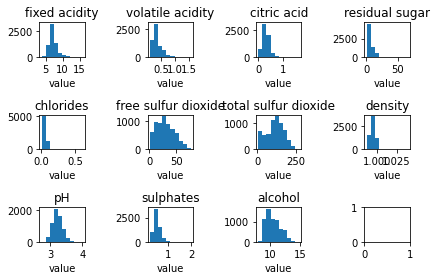

In [ ]:
# 히스토그램을 활용한 단변수분석

import matplotlib.pyplot as plt

rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols)
idx = 0

for row in range(rows):
  for col in range(cols):
    if idx == 11:
      break
    ax[row, col].hist(numeric_data[f'{numeric_data.columns[idx]}'])
    ax[row, col].set_title(f'{numeric_data.columns[idx]}')
    ax[row, col].set_xlabel('value')
    idx += 1

fig.tight_layout()
plt.show()

### Multivariate Analysis (다변량분석)
*Heatmap을 통해 Correlation Analyasis(상관변수 분석) 진행*







#### Correlation Analysis
- 단변량 분석에서 예상한 것처럼, **_Alcohol_** Feature가 0.6 정도의 Correlation으로 Label인 Quality와 가장 높은 상관관계를 보임
- 앞서 Feature들에 대해 설명했을 때, 와인의 바디(body)를 결정하는데 관여했던 두 요소인 <br>*Alcohol*과 *Density* Feature가 0.8 정도의 높은 상관관계를 보임
- Sulfur dioxide(이산화황)와 관련된 두 개의 Feature인 *Free sulfur dioxide*와 *Total sulfur dioxide* 또한 0.9 정도의 높은 상관관계를 보임

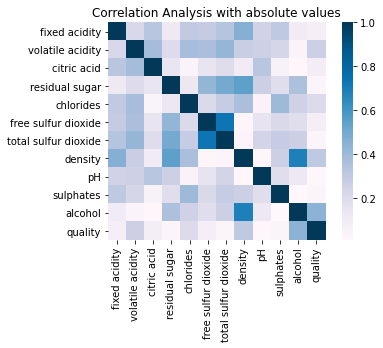

In [ ]:
import seaborn as sb
import numpy as np

corr = np.abs(cleaned_df.corr())
sb.heatmap(corr, square=True, cmap="PuBu")
plt.title("Correlation Analysis with absolute values")
plt.show()

### Problem Statements


1. ~feature들의 분포는 어떠한가? - *univariate analysis*~
1. ~어떤 feature가 Class인 *quality*와 가장 상관성이 높은가? - *correlation analysis*~
2. 어떤 Model이 주어진 feature들을 통한 quality classification을 가장 잘 설명할 수 있는가? - *model selection problem*
3. 다양한 hyperparameter들을 조정하여 얻을 수 있는 best performance는 얼마인가? - *hyperparameter tuning*
4. best performance를 얻은 model에서, 가장 중요한 3개의 feature는 무엇인가? - *feature selection problem*
5. feature selection을 적용한 data에 대해 다시 model을 적용하였을 때 성능 차이는 어떠한가? - *feature selection problem*
6. Clustering을 적용하였을 때에도 Classification Model과 유사한 결과를 얻을 수 있는가? - *unsupervised learning*


##5. Mode & Metrics
*Multi-class classification Models, Experiment Metrics*

### Model 목록 및 선정 이유

Model | Type | 선정 이유
:---: | :---: | :---:
**ZeroR** | Label-base Classifier | 가장 간단한 분류 방법으로, Label에만 의존<br><br>예측 능력은 없지만, **표준 성능을 가늠**하기 위해 사용
**Gaussian Naive Bayes** | Probabilistic Classifier | Naive Bayes 확률에 기반한 Classifier<br><br>확률적 모델로도 해당 Wine quality를 잘 분류해 낼 수 있을지 확인하고자 실험
**Logistic Regression** | Linear Model | Multiclass classification을 위해, logistic regression classifier를 사용<br><br>*'multiclass= '* parameter를 'ovr'과 'multinomial'로 구분지어 2개의 model 실험
**Perceptron** | Linear Model | 간단한 Linear Model 중 하나인 Perceptron으로 실험<br><br>Multiclass classification인 만큼 좋은 성능을 기대하기는 어렵다고 예상
**Decision Tree** | Tree | 널리 사용되는 classifier인 decision tree를 활용해 실험<br><br>Decision Tree의 특성상 Hyperparameter등을 적당히 조절할 경우 좋은 성능을 기대할 수 있으나,<br> **Overfitting**의 문제가 발생하기 쉬우므로 적절한 수준의 Overfitting handling이 필요할 것으로 예상됨
**KNN(K-Nearest Neighbor)** | Instance Based Learning | Instance Based Learning 중 수업시간에 다룬 KNN 기법을 활용<br><br>최적의 성능을 보이는 *k*값은 얼마인지 실험
**MLP(Multi-Layer Perceptron)** |Non-linear Model| 해당 Data가 어떠한 특징을 가지고 있는지 알 수 없기 때문에, <br>nonlinear한 Problem들을 다루기 위한 MLP 또한 실험<br><br>Iteration의 경우 Convergence Warning이 발생하지 않는 선에서 조절
**Random Forest** | Ensemble | Ensemble 기법 중 하나인 Random Forest를 활용하여 Decision Tree의 **Overfitting 문제**를 완화하고,<br>Hyperparameter tuning을 통한 성능 개선을 실험
**K-Means++** | Clustering | Unsupervised Learning 중 하나인 K-Means++ 알고리즘을 통해 Data 분류 및 supervised learning 알고리즘들과의 비교

### Metrics


#### Train/Test data size
  - 이상치를 제거한 cleaned_df의 Instance 개수: 6394
  - 비교적 small dataset에 속하기 때문에, Train(0.8) : Test(0.2)의 비율로 구성


In [ ]:
# Train/Test Data 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numeric_data, label, test_size=0.2, random_state=42)


#### Cross Validation
  - K-fold Cross Validation을 통해 성능 평가의 신뢰도를 높임
  - 마찬가지로 Instance의 개수가 많지 않은 small dataset이기 때문에 **k=5**으로 구성

In [ ]:
# 추후 Model 성능 평가 시 활용하기 위한 cross_val_score Import

from sklearn.model_selection import cross_val_score

#### Normalization & Standardization
  - Model의 성능 개선을 위해 Normalization과 Standardization을 각각 적용
  - Normalization: **Min-Max Normalization** 활용
  - Standardization: **StandardScaler** 활용
  - 모든 구현은 Pipeline을 통해 실험

In [ ]:
# 추후 Model 성능 평가 시 전처리를 위한 Min-Max Scaler, Standard Scaler Import

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

##6. Experiment
*Multi-class Classification Experiment*

### ZeroR
- 기준 Quality Value: **6**
- 최종 Model Score: **0.4368** __(Baseline)__

In [ ]:
# quality feature 확인

cleaned_df['quality']

0       6
1       6
2       6
3       6
4       6
       ..
6491    6
6492    5
6494    6
6495    5
6496    6
Name: quality, Length: 6394, dtype: int64

In [ ]:
# quality feature의 각 category별 갯수 확인

cleaned_df['quality'].value_counts(sort=True)

6    2793
5    2106
7    1066
4     212
8     187
3      25
9       5
Name: quality, dtype: int64

In [ ]:
# 전체 Model들의 Score를 담을 Model_Score_Dict Dictionary 정의
# ZeroR Score 계산

Model_Score_Dict = {}
Model_Score_Dict['ZeroR'] = 2793 / (2793 + 2106 + 1066 + 212 + 187 + 25 + 5)
print(Model_Score_Dict)

{'ZeroR': 0.43681576477948075}


### Experiment Design - Supervised Learning Pipeline
  - 여러가지 Model들을 Pipeline으로 구성
  - *__Scaler_dict__*: Normalization과 Standardization을 저장하는 Dictionary
  - *__model_dict__*: Supervised Learning Algorithm들을 저장하는 Dictionary



In [ ]:
# Import Models

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Experiment 1 - Default Models (Without Hyperparameter Tuning)
  - Cross Validation을 활용해 hyperparameter를 조정하지 않은 기본 Model들로 성능 평가
  - 일정한 결과를 위해 *random_state* 값을 42로 설정 후 평가 진행
  - Default model들에서는 여러 Warning들이 발생하는 것을 확인 가능
    1. Logistic Regression에서 Max_iter가 너무 작아 Fail to converge에 대한 Warning
    2. MLP에서 Max_iter = 200이 너무 작아 Optimization이 제대로 진행되지 않았음을 나타내는 Warning


In [ ]:
# Dictionary 정의

scaler_dict = {}
scaler_dict['std_scaler'] = StandardScaler()
scaler_dict['minmax_scaler'] = MinMaxScaler()

model_dict = {}
model_dict['gaussian_nb'] = GaussianNB()
model_dict['logistic_regression_ovr'] = LogisticRegression(multi_class='ovr', random_state=42)
model_dict['logistic_regression_multinomial'] = LogisticRegression(multi_class='multinomial', random_state=42)
model_dict['perceptron'] = Perceptron(random_state=42)
model_dict['decision_tree'] = tree.DecisionTreeClassifier(random_state=42)
model_dict['knn'] = KNeighborsClassifier()
model_dict['random_forest'] = RandomForestClassifier(random_state=42)
model_dict['mlp'] = MLPClassifier(random_state=42)

In [ ]:
# Default Model Experiment

import pprint

score_dict = {}

for scaler in scaler_dict.keys():
  for model in model_dict.keys():
    pipe = Pipeline([('scaler', scaler_dict[scaler]), ('model', model_dict[model])])

    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    score_dict[f'{scaler}_{model}'] = scores.mean()

print("\n")
pp = pprint.PrettyPrinter(width=20, indent=4)
pp.pprint(score_dict)
print("\n")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




{   'minmax_scaler_decision_tree': 0.5826001955034213,
    'minmax_scaler_gaussian_nb': 0.44007820136852394,
    'minmax_scaler_knn': 0.5362658846529814,
    'minmax_scaler_logistic_regression_multinomial': 0.5454545454545454,
    'minmax_scaler_logistic_regression_ovr': 0.5390029325513196,
    'minmax_scaler_mlp': 0.563049853372434,
    'minmax_scaler_perceptron': 0.4328445747800586,
    'minmax_scaler_random_forest': 0.6639296187683283,
    'std_scaler_decision_tree': 0.5835777126099707,
    'std_scaler_gaussian_nb': 0.44007820136852394,
    'std_scaler_knn': 0.5481915933528836,
    'std_scaler_logistic_regression_multinomial': 0.5458455522971651,
    'std_scaler_logistic_regression_ovr': 0.5419354838709677,
    'std_scaler_mlp': 0.561681329423265,
    'std_scaler_perceptron': 0.4130987292277615,
    'std_scaler_random_forest': 0.6649071358748777}




/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### 결과 해석
- **Perceptron, Gaussian_nb**: 두 Scaler 모두 Baseline인 ZeroR의 **43.8%**보다 저조하거나 이와 비슷한 성능을 보였으므로 추후 실험에서 제외
- **Random Forest**: Random Forest에서 두 Scaler가 유사한 **66%**대의 최고 성능을 보임
- **그 외 Model**: 약 55%대의 성능들을 보이고 있으나, Convergence Warning을 다루기 위해 LR과 MLP의 *max_iter* 값을 조정 후 재평가 필요

  

#### Problem Statement
1. ~feature들의 분포는 어떠한가? - *univariate analysis*~
1. ~어떤 feature가 Class인 *quality*와 가장 상관성이 높은가? - *correlation analysis*~
2. ~어떤 Model이 주어진 feature들을 통한 quality classification을 가장 잘 설명할 수 있는가? - *model selection problem*~
3. 다양한 hyperparameter들을 조정하여 얻을 수 있는 best performance는 얼마인가? - *hyperparameter tuning*
4. best performance를 얻은 model에서, 가장 중요한 3개의 feature는 무엇인가? - *feature selection problem*
5. feature selection을 적용한 data에 대해 다시 model을 적용하였을 때 성능 차이는 어떠한가? - *feature selection problem*
6. Clustering을 적용하였을 때에도 Classification Model과 유사한 결과를 얻을 수 있는가? - *unsupervised learning*


### Experiment 2 - Tuning ' *max_iter* '
- 앞서 결과 해석에서 제시한 것처럼, 저조한 성능을 보인 Perceptron과 Gaussian_nb 삭제
- Logistic Regression과 MLP의 Convergence Warning을 제거하기 위해, 'max_iter' parameter를 각각 2000, 5000의 값을 주고 재실험

In [ ]:
# Removing Perceptron and Gaussian NB

del model_dict['perceptron']
del model_dict['gaussian_nb']

In [ ]:
# Tuning Hyperparameter

model_dict['logistic_regression_ovr'] = LogisticRegression(multi_class='ovr', random_state=42, max_iter=2000)
model_dict['logistic_regression_multinomial'] = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=2000)
model_dict['mlp'] = MLPClassifier(random_state=42, max_iter=5000)

In [ ]:
# Default Model Experiment

score_dict = {}

for scaler in scaler_dict.keys():
  for model in model_dict.keys():
    pipe = Pipeline([('scaler', scaler_dict[scaler]), ('model', model_dict[model])])

    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    score_dict[f'{scaler}_{model}'] = scores.mean()

print("\n")
pp.pprint(score_dict)
print("\n")



{   'minmax_scaler_decision_tree': 0.5826001955034213,
    'minmax_scaler_knn': 0.5362658846529814,
    'minmax_scaler_logistic_regression_multinomial': 0.5454545454545454,
    'minmax_scaler_logistic_regression_ovr': 0.5390029325513196,
    'minmax_scaler_mlp': 0.5644183773216032,
    'minmax_scaler_random_forest': 0.6639296187683283,
    'std_scaler_decision_tree': 0.5835777126099707,
    'std_scaler_knn': 0.5481915933528836,
    'std_scaler_logistic_regression_multinomial': 0.5454545454545454,
    'std_scaler_logistic_regression_ovr': 0.5419354838709677,
    'std_scaler_mlp': 0.565982404692082,
    'std_scaler_random_forest': 0.6649071358748777}




#### 결과 해석
- 2,000과 5,000의 max_iter를 적용한 결과 Convergence Warning은 발생하지 않음
- 하지만, LR과 MLP 모두 *0.3%*정도의 거의 없는 수준의 성능 개선이 이뤄짐: max_iter 외의 다른 hyperparameter의 조정이 필요
- MinMaxScaler와 StandardScaler가 유사한 성능을 보이므로, Standard Scaler에 대해서만 실험 진행
- 가장 좋은 성능을 보인 3개의 Model에 대해서만 추가 실험 진행
  1. Random Forest
  2. MLP
  3. Decision Tree


### Experiment 3 - Tuning Hyperparameters
- MinMaxScaler 제거 및 상위 3개의 Model만 실험 (이외의 Model들은 제외)
- Decision Tree의 경우 *max_leaf_nodes* parameter를 활용해 **Pruning** 진행
- MLP의 경우 Regularization에 관여하는 alpha 값과, learning_rate를 조절
- Random Forest의 경우 Decision Tree의 개수인 n_estimators를 조절


#### Decision Tree

In [ ]:
# Removing MinMax Scaler and Bad Performance Models

del scaler_dict['minmax_scaler']

del model_dict['knn']
del model_dict['logistic_regression_multinomial']
del model_dict['logistic_regression_ovr']

In [ ]:
# Tuning Hyperparameter - Decision Tree Pruning

max_leaf_list = [10, 50, 100, 200, 500, 1000, 1500, 2000]
tree_score_list = []

for max_leaf in max_leaf_list:
  dt = tree.DecisionTreeClassifier(random_state=42, max_leaf_nodes= max_leaf)
  scores = cross_val_score(dt, X_train, y_train, cv=5)
  tree_score_list.append(scores.mean())

print("\n")
pp.pprint(tree_score_list)
print("\n")



[   0.5274682306940371,
    0.5532746823069403,
    0.5542521994134897,
    0.5595307917888562,
    0.5652003910068426,
    0.5835777126099707,
    0.5837732160312805,
    0.5837732160312805]




##### Decision Tree 결과 해석
- Decision Tree의 경우 max_leaf_list가 커질수록 전체적으로 성능이 개선됨
- 이는 하부 Tree를 제거하여, 일반화 성능을 높이고 **Overfitting의 위험을 줄여주기 때문**으로 생각됨

#### MLP

In [ ]:
# Tuning Hyperparameter - MLP

alpha_list = [0.01, 0.001, 0.0005]
learning_rate_init_list = [0.01, 0.05, 0.001, 0.0005]
mlp_score_list = []

for alpha in alpha_list:
  for learning_rate in learning_rate_init_list:
    mlp = MLPClassifier(random_state=42, alpha= alpha, learning_rate_init= learning_rate, max_iter=2000)
    scores = cross_val_score(mlp, X_train, y_train, cv=5)
    mlp_score_list.append(scores.mean())

print("\n")
pp.pprint(mlp_score_list)
print("\n")




[   0.5206256109481916,
    0.5204301075268817,
    0.5300097751710655,
    0.5264907135874878,
    0.5071358748778103,
    0.5043988269794721,
    0.5270772238514174,
    0.52297165200391,
    0.5257086999022482,
    0.52297165200391,
    0.5219941348973607,
    0.5290322580645161]




##### MLP 결과 해석
- 다양한 alpha값과 learning_rate_init 값을 적용해보았으나, 유의미한 성능개선이 이뤄지지 않음

#### Random Forest


In [ ]:
# Tuning Hyperparameter - Random Forest

n_estimators_list = [100, 300, 500, 700]
rf_score_list = []

for estimators in n_estimators_list:
  rf = RandomForestClassifier(random_state=42, n_estimators= estimators)
  scores = cross_val_score(rf, X_train, y_train, cv=5)
  rf_score_list.append(scores.mean())

print("\n")
pp.pprint(rf_score_list)
print("\n")



[   0.6635386119257086,
    0.6656891495601173,
    0.6682306940371456,
    0.6680351906158357]




##### Random Forest 결과 해석
- n_estimators= 500인 경우에 최고 성능 66.8%를 보임

#### 최종 결과
- Random Forest에서 최고의 성능을 보임 (**66.8%**)
- Random Forest의 hyperparameter인 n_estimators가 증가할수록 CV Score가 높아지는 경향을 보임 <br>(다양한 Decision Tree들을 활용해 Overfitting의 위험을 줄이기 때문으로 생각됨)


#### Problem Statement
1. ~feature들의 분포는 어떠한가? - *univariate analysis*~
1. ~어떤 feature가 Class인 *quality*와 가장 상관성이 높은가? - *correlation analysis*~
2. ~어떤 Model이 주어진 feature들을 통한 quality classification을 가장 잘 설명할 수 있는가? - *model selection problem*~
3. ~다양한 hyperparameter들을 조정하여 얻을 수 있는 best performance는 얼마인가? - *hyperparameter tuning*~
4. best performance를 얻은 model에서, 가장 중요한 3개의 feature는 무엇인가? - *feature selection problem*
5. feature selection을 적용한 data에 대해 다시 model을 적용하였을 때 성능 차이는 어떠한가? - *feature selection problem*
6. Clustering을 적용하였을 때에도 Classification Model과 유사한 결과를 얻을 수 있는가? - *unsupervised learning*


### Experiment 4 - Feature Selection
- Random Forest의 Feature Importance를 바탕으로 가장 중요한 3개의 Feature 확인
- Feature Selection Algorithm을 통해 Feature Select, 성능 평가


#### Feature Importance

Feature ranking:
1. feature 10 (0.123571)
2. feature 7 (0.103144)
3. feature 1 (0.100009)
4. feature 6 (0.092309)
5. feature 4 (0.086986)
6. feature 9 (0.086535)
7. feature 5 (0.086372)
8. feature 3 (0.084867)
9. feature 8 (0.082173)
10. feature 2 (0.079918)
11. feature 0 (0.074115)


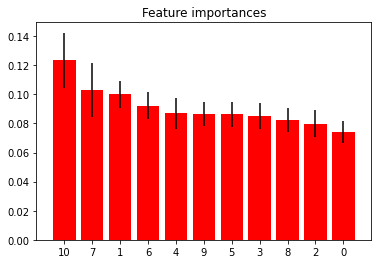

In [ ]:
# Printing and Visualizing Feature Ranking

rf = RandomForestClassifier(random_state=42, n_estimators=500)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# What is feature 10, 7, 1?

print(numeric_data.columns[10])
print(numeric_data.columns[7])
print(numeric_data.columns[1])

alcohol
density
volatile acidity


#### Selecting K-best features

In [ ]:
# Select K-best Features

from sklearn.feature_selection import SelectKBest, chi2

k_list = [3, 5, 7, 9]
k_score_list = []

for val in k_list:
  X_new = SelectKBest(chi2, k=val).fit_transform(X_train, y_train)
  score = cross_val_score(rf, X_new, y_train, cv=5)
  k_score_list.append(score.mean())

print(k_score_list)

[0.5562072336265884, 0.6531769305962853, 0.6600195503421309, 0.6694037145650048]


#### 결과 해석
- 일반적으로는 Feature를 추출해 Dataset을 재구성할 경우 일반화 성능이 올라감
- 하지만 본 Data의 경우 **feature가 적은 편이며, Instance 개수 또한 적은 small-dataset**에 속해 k를 3 정도로 줄 경우 오히려 성능이 대폭 감소
- Data들이 고르게 분포 되어 있지 않은 것 또한 성능 감소에 영향을 미쳤으리라 생각됨
- 거의 대부분의 feature인 9개를 선택할 때, hyperparameter를 tuning해 얻은 성능(66.8%)에 준하는 성능이 나옴을 알 수 있음


#### Problem Statement
1. ~feature들의 분포는 어떠한가? - *univariate analysis*~
1. ~어떤 feature가 Class인 *quality*와 가장 상관성이 높은가? - *correlation analysis*~
2. ~어떤 Model이 주어진 feature들을 통한 quality classification을 가장 잘 설명할 수 있는가? - *model selection problem*~
3. ~다양한 hyperparameter들을 조정하여 얻을 수 있는 best performance는 얼마인가? - *hyperparameter tuning*~
4. ~best performance를 얻은 model에서, 가장 중요한 3개의 feature는 무엇인가? - *feature selection problem*~
5. ~feature selection을 적용한 data에 대해 다시 model을 적용하였을 때 성능 차이는 어떠한가? - *feature selection problem*~
6. Clustering을 적용하였을 때에도 Classification Model과 유사한 결과를 얻을 수 있는가? - *unsupervised learning*


### Experiment 5 - Test Accuracy
- 앞서 hyperparameter들을 tuning한 Decision Tree, MLP, Random Forest Model에 대해 Test Accuracy 평가


In [ ]:
# Print Test Accuracy of 3 models

dt.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)

print(dt.score(X_test, y_test))
print(mlp.score(X_test, y_test))
print(rf.score(X_test, y_test))

0.6184519155590305
0.5347928068803753
0.6982017200938233


#### 결과 해석
- 모두 Training Phase보다 1~2% 정도 좋은 성능을 보임
- Decision Tree의 Pruning, Random Forest의 n_estimators와 Cross Validation을 활용해 **Overfitting의 위험성을 줄였기 때문**으로 생각됨

### Experiment 6 - Unsupervised Learning(Clustering)


- K-means Algorithm을 활용해 Unsupervised Learning 진행
- Cluster의 개수는 Label이 갖는 value들의 개수인 7로 설정 (3 ~ 9)
- 일정한 출력값을 위해 random_state = 42로 설정

In [ ]:
# K-means clustering with 7 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(numeric_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# Print New labels made by kmeans cluster

import collections

new_labels = kmeans.predict(numeric_data)
collections.Counter(new_labels) 

Counter({0: 905, 1: 1112, 2: 876, 3: 697, 4: 361, 5: 1356, 6: 1087})

In [ ]:
# Original values of 'quality' labels

cleaned_df['quality'].value_counts(sort=True)

6    2793
5    2106
7    1066
4     212
8     187
3      25
9       5
Name: quality, dtype: int64

In [ ]:
# Re-labeling by value frequencies

new_labels_cor = np.empty(label.shape)

for i in range(len(new_labels)):
  if new_labels[i] == 5:
    new_labels_cor[i] = 6
  if new_labels[i] == 1:
    new_labels_cor[i] = 5
  if new_labels[i] == 6:
    new_labels_cor[i] = 7
  if new_labels[i] == 0:
    new_labels_cor[i] = 4
  if new_labels[i] == 2:
    new_labels_cor[i] = 8
  if new_labels[i] == 3:
    new_labels_cor[i] = 3
  if new_labels[i] == 4:
    new_labels_cor[i] = 9

In [ ]:
# Cross Tabulation

crosstab_df = pd.DataFrame({'labels': label, 'clustered_digits':new_labels_cor})
ct = pd.crosstab(crosstab_df['labels'], crosstab_df['clustered_digits'])
print(ct)

clustered_digits  3.0  4.0  5.0  6.0  7.0  8.0  9.0
labels                                             
3                   5    9    2    3    2    3    1
4                  43   38   19   30   40   34    8
5                 256  320  370  345  270  377  168
6                 304  381  490  613  483  362  160
7                  78  144  188  304  245   89   18
8                  11   13   42   58   46   11    6
9                   0    0    1    3    1    0    0


#### 결과 해석
- 전체적으로, Clustering을 통해서는 정확한 예측이 어려움
- label이 5, 6, 7인 경우만 어느 정도 근접한 예측이 가능하며, 그 이외에는 크게 의미가 없음
- 이는 원래 Dataset의 **Class간 Imbalance가 크기 때문**으로 생각됨 (5, 6, 7의 quality가 가장 많고, 3, 4, 8, 9의 quality는 극소수)

## 7. 결론



### Best Performance
- 여러 전처리 과정과 Hyperparameter Tuning을 한 결과, **Random Forest**에서 **66.8%**의 최고 성능을 보임
- 이는 좋은 성능이라고 보기엔 다소 낮은 감이 있으며, 그 원인은 다음과 같다고 생각됨
  1. 약 6,500개의 **small-size dataset**
  2. Wine Quality라는 label의 특성상, 5, 6, 7의 중간 점수대에 많이 분포하는 **Imbalanced Class**

### Overfitting Problem
- Overfitting을 방지하기 위한 여러 Model 및 처리를 했기 때문에, Overfitting 문제는 크게 발생하지 않음

### Feature Importance & Selection
- Random Forest에서 Feature Importance를 측정해 본 결과, Correlation Analysis에서 가장 높은 상관관계를 보였던 <br>'Alcohol' Feature와 'Density' Feature가 마찬가지로 높은 Importance를 보임
- Feature Selection을 진행해 본 결과, small-size dataset이라는 한계 때문에 적은 Feature를 선택하면 오히려 성능이 떨어지는 경향을 보임

### Clustering
- 중간 정도의 quality인 5, 6, 7점의 경우만 어느 정도 일치하는 경향을 보이며, 그 외에는 완전히 상반된 결과가 나옴
- 마찬가지로 Imbalanced Class와 Small-size dataset에서 기인한 것으로 생각됨